# Imbalanced Data
Suppose we have an imbalanced data set where the majority of our data is of one value. We can obtain high accuracy for the model by predicting the majority class.


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [2]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7155
Confusion matrix
[[ 365  135]
 [2710 6790]]
class 0 accuracy: 0.73
class 1 accuracy: 0.7147368421052631


#AUC

In [4]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5


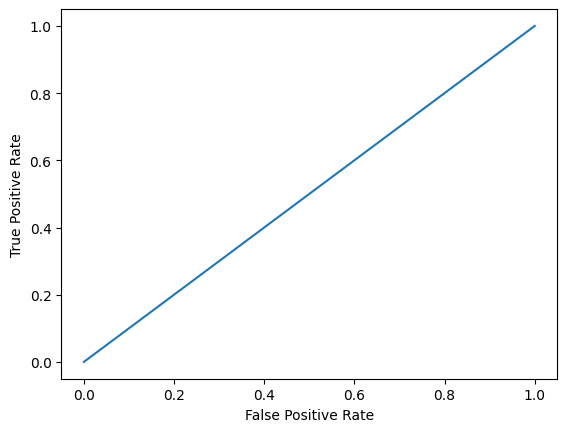

In [5]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

model 2 AUC score: 0.842850947368421


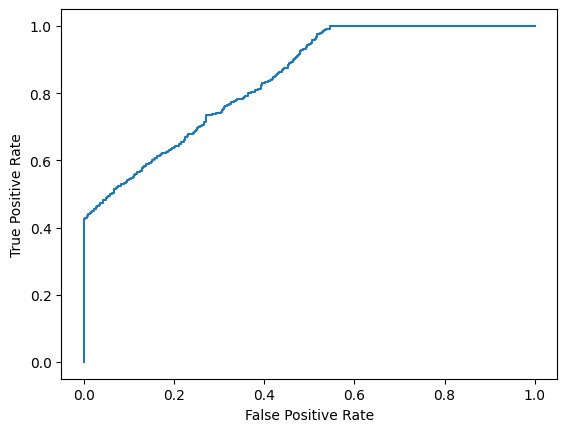

In [6]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

# Probabilities

In [7]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.75155
model 2 accuracy score: 0.7516
model 1 AUC score: 0.77608935
model 2 AUC score: 0.8582241800000001


# Plot model 1:

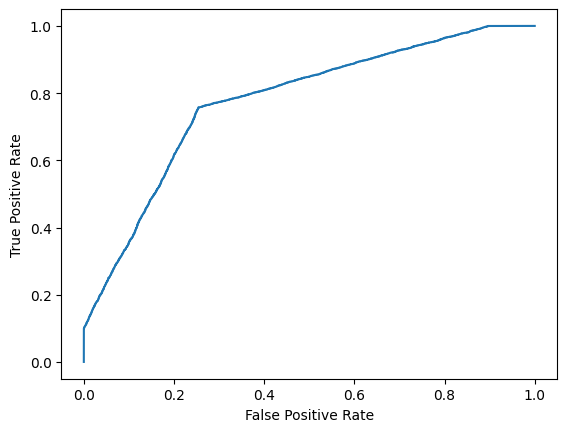

In [8]:
plot_roc_curve(y, y_prob_1)

#Plot model 2:

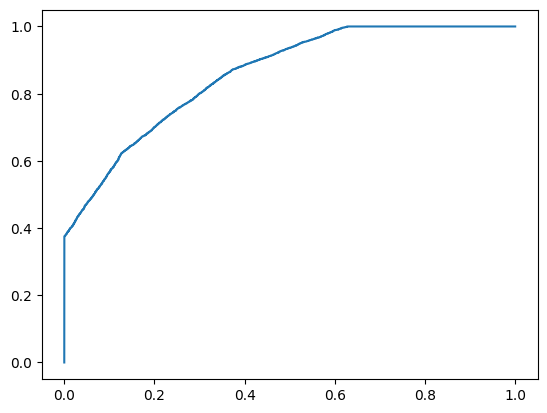

In [9]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)